170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2106s 12us/step


C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.3479 - loss: 1.7889 - val_accuracy: 0.5436 - val_loss: 1.3023
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.5531 - loss: 1.2542 - val_accuracy: 0.6106 - val_loss: 1.1290
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.6180 - loss: 1.0998 - val_accuracy: 0.6241 - val_loss: 1.0896
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.6566 - loss: 0.9918 - val_accuracy: 0.6309 - val_loss: 1.0878
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.6829 - loss: 0.9134 - val_accuracy: 0.6609 - val_loss: 0.9852
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7041 - loss: 0.8448 - val_accuracy: 0.6652 - val_loss: 0.9684
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.7212 - loss: 0.7955 - val_accuracy: 0.6809 - val_loss: 0.9426
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7392 - loss: 0.7510 - 

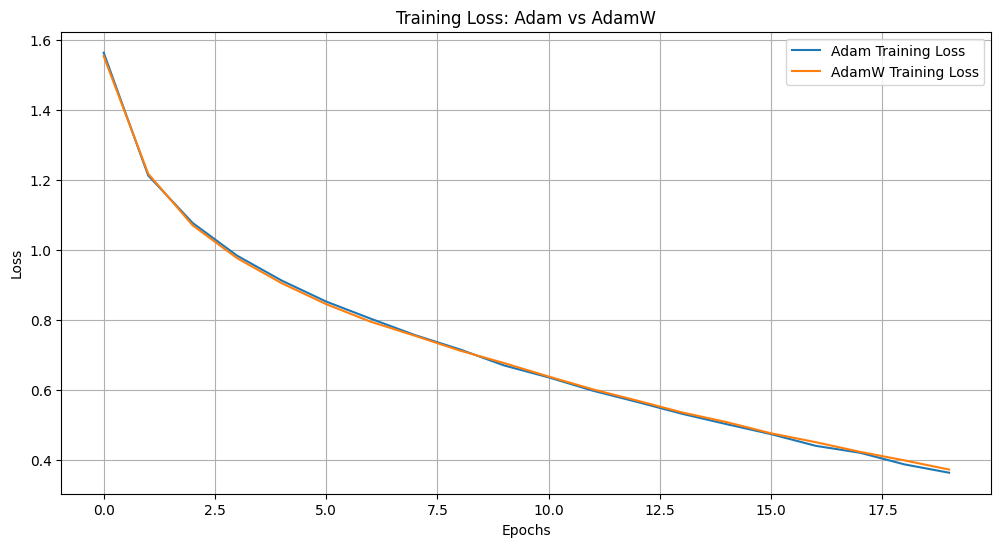

Test Accuracy (Adam): 0.6829
Test Accuracy (AdamW): 0.6812


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

def build_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

model_adam = build_cnn()
model_adam.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_adam = model_adam.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

model_adamw = build_cnn()
optimizer_adamw = tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=0.01)
model_adamw.compile(optimizer=optimizer_adamw, loss='categorical_crossentropy', metrics=['accuracy'])
history_adamw = model_adamw.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

plt.figure(figsize=(12, 6))
plt.plot(history_adam.history['loss'], label='Adam Training Loss')
plt.plot(history_adamw.history['loss'], label='AdamW Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss: Adam vs AdamW')
plt.legend()
plt.grid()
plt.show()

test_loss_adam, test_acc_adam = model_adam.evaluate(X_test, y_test, verbose=0)
test_loss_adamw, test_acc_adamw = model_adamw.evaluate(X_test, y_test, verbose=0)

print(f"Test Accuracy (Adam): {test_acc_adam:.4f}")
print(f"Test Accuracy (AdamW): {test_acc_adamw:.4f}")